# Imports

In [1]:
from IPython.display import Image
from sympy.physics.mechanics import  init_vprinting
from sympy.physics.vector import vlatex
from sympy import *
from sympy.printing.pycode import pycode

# Problem definition

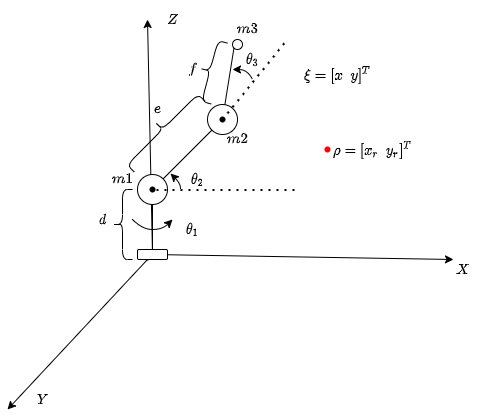

In [2]:
Image("diagram_3d.png")

# Variables definition

In [3]:

x, y, z, t, d, e, f = symbols('x y z t d e f')
xi, m1, m2, m3, g = symbols(r'\xi m_1 m_2 m_3 g')
th1 = Function(r'\theta_1')(t)
th2 = Function(r'\theta_2')(t)
th3 = Function(r'\theta_3')(t)
init_vprinting()



# Kinematics

Enquanto( $\xi $ estiver longe demais de $ \rho$){<br>
 <p>&ensp;&ensp;Compute $j(\xi , \Theta)$ para a pose atual $\Theta$ compute $j^{-1}$  // inverta a matriz Jacobiana <br></p>
<p>&ensp;&ensp; $\delta \xi = \beta(\rho - \xi)$  // escolha um passo apropriado<br></p>
<p>&ensp;&ensp; $\Delta \Theta = j^-1 \Delta \xi$  // compute as mudanças nas juntas<br></p>
<p>&ensp;&ensp; $\Theta = \Theta + \Delta \Theta$  // aplique as mudanças nas juntas<br></p>
<p>&ensp;&ensp; Compute o novo $\xi$  // utilize cinemática direta </p>}


In [4]:
x = e*(cos(th1)*cos(th2)) + f*cos(th1)*cos(th2+th3)
y = e*(sin(th1)*cos(th2)) + f*sin(th1)*cos(th2 + th3)
z = d + e*sin(th2) + f*sin(th2 + th3)
xi = Matrix([x, y, z])
# print(vlatex(xi))
xi

⎡e⋅cos(\theta₁)⋅cos(\theta₂) + f⋅cos(\theta₂ + \theta₃)⋅cos(\theta₁)⎤
⎢                                                                   ⎥
⎢e⋅sin(\theta₁)⋅cos(\theta₂) + f⋅sin(\theta₁)⋅cos(\theta₂ + \theta₃)⎥
⎢                                                                   ⎥
⎣           d + e⋅sin(\theta₂) + f⋅sin(\theta₂ + \theta₃)           ⎦

In [5]:
J = Matrix([[x.diff(th1), x.diff(th2), x.diff(th3)],\
            [y.diff(th1), y.diff(th2), y.diff(th3)],\
            [z.diff(th1), z.diff(th2), z.diff(th3)]])
J
# print(vlatex(J))

⎡-e⋅sin(\theta₁)⋅cos(\theta₂) - f⋅sin(\theta₁)⋅cos(\theta₂ + \theta₃)  -e⋅sin(
⎢                                                                             
⎢e⋅cos(\theta₁)⋅cos(\theta₂) + f⋅cos(\theta₂ + \theta₃)⋅cos(\theta₁)   -e⋅sin(
⎢                                                                             
⎣                                 0                                           

\theta₂)⋅cos(\theta₁) - f⋅sin(\theta₂ + \theta₃)⋅cos(\theta₁)  -f⋅sin(\theta₂ 
                                                                              
\theta₁)⋅sin(\theta₂) - f⋅sin(\theta₂ + \theta₃)⋅sin(\theta₁)  -f⋅sin(\theta₂ 
                                                                              
      e⋅cos(\theta₂) + f⋅cos(\theta₂ + \theta₃)                       f⋅cos(\t

+ \theta₃)⋅cos(\theta₁)⎤
                       ⎥
+ \theta₃)⋅sin(\theta₁)⎥
                       ⎥
heta₂ + \theta₃)       ⎦

# Dynamics

Using Lagrangian
<center><big><strong>L = K - U</strong></big></center>


Modeling problem:

\begin{equation*}
    \dfrac{d}{dt} \dfrac{\partial L}{ \partial \dot q_i} - \dfrac{\partial L}{ \partial q_i} = F_i
\end{equation*}


## Position

In [6]:
x1 = 0
y1 = 0
z1 = d

x2 = e*cos(th2)*sin(th1)
y2 = e*cos(th2)*cos(th1)
z2 = d + e*sin(th2)

x3 = (e*cos(th2)+f*cos(th3+th2))*sin(th1)
y3 = (e*cos(th2)+f*cos(th3+th2))*cos(th1)
z3 = d + e*sin(th2) + f*sin(th3 + th2)

## Potencial Energy

In [7]:
U1 = m1*g*d
U2 = m2*g*(d+e*sin(th2))
U3 = m3*g*(d+e*sin(th2)+f*sin(th3 + th2))

## Kinematics Energy

In [8]:
k1 = 0
k2 = (1/2)*m2*(x2.diff(t)**2 + y2.diff(t)**2 + z2.diff(t)**2)
k3 = (1/2)*m3*(x3.diff(t)**2 + y3.diff(t)**2 + z3.diff(t)**2)

## Lagrangian

In [9]:
L = k1 + k2 + k3 - U1 - U2 - U3
# (L.diff(th1.diff(t))).diff(t) - L.diff(th1)


In [10]:
U = - U1 - U2 - U3

In [11]:
K =  k1 + k2 + k3 


In [22]:
q = Matrix([[th1] , [th2], [th3]])
q

⎡\theta₁⎤
⎢       ⎥
⎢\theta₂⎥
⎢       ⎥
⎣\theta₃⎦

Para a matriz de massa temos: $M_{ij}( \vec{q}) = \dfrac{\partial^2 K}{\partial \dot q_i \partial \dot q_j}$

In [13]:
M = Matrix([[0, 0, 0],[0, 0, 0],[0, 0, 0]],)
for i in range(3):
    for j in range(3):
        M[i,j] = (diff((K.diff(q[i].diff(t))),q[j].diff(t))).simplify()
M        

⎡ 2       2                                                          2        
⎢e ⋅m₂⋅cos (\theta₂) + m₃⋅(e⋅cos(\theta₂) + f⋅cos(\theta₂ + \theta₃))         
⎢                                                                             
⎢                                                                        2    
⎢                                  0                                    e ⋅m₂ 
⎢                                                                             
⎢                                                                             
⎣                                  0                                          

                                                                  ⎤
              0                                    0              ⎥
                                                                  ⎥
     ⎛ 2                         2⎞                               ⎥
+ m₃⋅⎝e  + 2⋅e⋅f⋅cos(\theta₃) + f ⎠  1.0⋅f⋅m₃⋅(e⋅cos(\theta₃) + f)⎥
                           

$C_i = \displaystyle \sum^n_{j=1} \sum^n_{k=1} \left ( \dfrac{\partial M_{ij}}{\partial q_k} - \dfrac{1}{2}\dfrac{\partial M_{jk}}{\partial q_i} \right ) \dot q_k$

In [14]:
C = Matrix([[0, 0, 0],[0, 0, 0],[0, 0, 0]],)
for i in range(3):
    for j in range(3):
        term = 0
        for k in range(3):
            term = term + (M[i,j].diff(q[k]) - (1/2)*M[j,k].diff(q[i]))*q[k].diff(t)
        C[i,j] = term.simplify()
C

⎡                                                                             
⎢-2⋅f⋅m₃⋅(e⋅cos(\theta₂) + f⋅cos(\theta₂ + \theta₃))⋅sin(\theta₂ + \theta₃)⋅\t
⎢                                                                             
⎢                                         ⎛                              ⎛ 2  
⎢                                         ⎜     2                        ⎜e ⋅s
⎢                                         ⎜0.5⋅e ⋅m₂⋅sin(2⋅\theta₂) + m₃⋅⎜────
⎢                                         ⎝                              ⎝    
⎢                                                                             
⎣                                                             1.0⋅f⋅m₃⋅(e⋅cos(

        ⎛ 2                        ⎛ 2                                        
hėta₃ - ⎝e ⋅m₂⋅sin(2⋅\theta₂) + m₃⋅⎝e ⋅sin(2⋅\theta₂) + 2⋅e⋅f⋅sin(2⋅\theta₂ +
                                                                              
                                                2  

$G_i = - \displaystyle \sum^n_{j=1}m_j g^T \dfrac{\partial p_{cj}}{\partial q_i} $

In [16]:
G = -U.diff(q)
G

⎡                                  0                                   ⎤
⎢                                                                      ⎥
⎢e⋅g⋅m₂⋅cos(\theta₂) + g⋅m₃⋅(e⋅cos(\theta₂) + f⋅cos(\theta₂ + \theta₃))⎥
⎢                                                                      ⎥
⎣                    f⋅g⋅m₃⋅cos(\theta₂ + \theta₃)                     ⎦

In [17]:
for i in range(3):
    for j in range(3):
        M[i,j] = M[i,j].simplify()
        C[i,j] = C[i,j].simplify()
 

In [18]:
th1_s, th2_s, th3_s = symbols('th1 th2 th3')
pycode(M[0,0].subs([(th1,th1_s), (th2,th2_s), (th3,th3_s)]))

'e**2*m_2*math.cos(th2)**2 + m_3*(e*math.cos(th2) + f*math.cos(th2 + th3))**2'

In [19]:
th1_s, th2_s, th3_s = symbols('th1 th2 th3')
pycode(C[0,0].subs([(th1,th1_s),(th1.diff(t),th1_s**2),(th2.diff(t),th2_s**2),(th3.diff(t),th3_s**2),  (th2,th2_s), (th3,th3_s)]).simplify())

'-2*f*m_3*th3**2*(e*math.cos(th2) + f*math.cos(th2 + th3))*math.sin(th2 + th3) - th2**2*(e**2*m_2*math.sin(2*th2) + e**2*m_3*math.sin(2*th2) + 2*e*f*m_3*math.sin(2*th2 + th3) + f**2*m_3*math.sin(2*th2 + 2*th3))'

In [20]:
th1_s, th2_s, th3_s = symbols('th1 th2 th3')
pycode(G[0].subs([(th1,th1_s),(th1.diff(t),th1_s**2),(th2.diff(t),th2_s**2),(th3.diff(t),th3_s**2),  (th2,th2_s), (th3,th3_s)]).simplify())

'0'